In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
movies = pd.read_csv('data/movies_data.csv',index_col=['tconst'])

movies = movies.drop('Unnamed: 0',axis=1)

movies['numVotes'] = movies['numVotes'].astype('int')

movies = movies.dropna(subset='startYear')

movies['startYear'] = movies['startYear'].astype('int')

In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 324774 entries, tt0000009 to tt9916730
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   primaryTitle    324774 non-null  object 
 1   originalTitle   324774 non-null  object 
 2   isAdult         324774 non-null  int64  
 3   startYear       324774 non-null  int64  
 4   runtimeMinutes  291709 non-null  float64
 5   genres          313876 non-null  object 
 6   averageRating   324774 non-null  float64
 7   numVotes        324774 non-null  int64  
 8   directors       320731 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 24.8+ MB


In [4]:
movies.head()

,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres,averageRating,numVotes,directors
tconst,,,,,,,,,
tt0000009,Miss Jerry,Miss Jerry,0,1894,45.0,Romance,5.4,218,Alexander Black
tt0000147,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,100.0,"Documentary,News,Sport",5.3,549,Enoch J. Rector
tt0000502,Bohemios,Bohemios,0,1905,100.0,NaN,3.8,20,Ricardo de Baños
tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,70.0,"Action,Adventure,Biography",6.0,969,Charles Tait
tt0000591,The Prodigal Son,L'enfant prodigue,0,1907,90.0,Drama,5.6,30,Michel Carré


In [5]:
bins = [1800,
    1900,
    1910,
    1920,
    1930,
    1940,
    1950,
    1960,
    1970,
    1980,
    1990,
    2000,
    2010,
    2020,
    2030
 ]

labels = [
    "<1900s",
    '1900s',
    '1910s',
    '1920s',
    '1930s',
    '1940s',
    '1950s',
    '1960s',
    '1970s',
    '1980s',
    '1990s',
    '2000s',
    '2010s',
    '2020s'
    ]

movies['decades'] = pd.cut(movies['startYear'],bins=bins,labels=labels)


#### Analise de tendências por décadas:
- Como variou a quantidade de filmes produzidos?
- Como variou o tempo médio de duração de um filme?


In [6]:
movie_by_dec = movies.groupby('decades').agg({'primaryTitle': 'count', 'runtimeMinutes':'mean', 'averageRating': 'mean'}).reset_index()
movie_by_dec

,decades,primaryTitle,runtimeMinutes,averageRating
0,<1900s,12,76.666667,4.200000
1,1900s,117,68.000000,4.491453
2,1910s,2408,73.407207,5.833306
3,1920s,4593,79.471679,6.062378
4,1930s,9794,80.715201,6.109567
5,1940s,9364,86.407146,6.178289
6,1950s,13543,92.795822,6.170811
7,1960s,18383,95.071949,6.067883
8,1970s,23537,94.257581,5.901563
9,1980s,26952,96.680915,5.904886


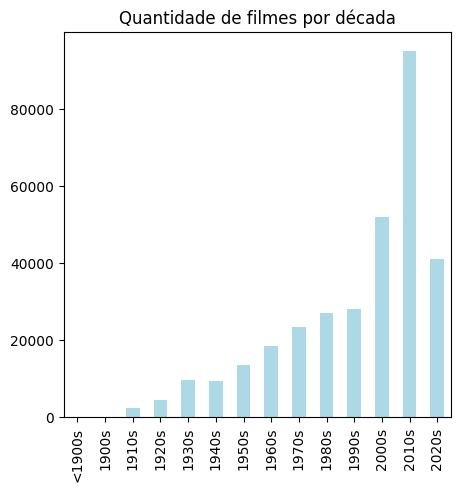

In [7]:
DEFAULT_COLOR = 'lightblue'

ax = movie_by_dec.plot.bar('decades','primaryTitle',legend=False,figsize=(5,5),title='Quantidade de filmes por década',xlabel='',color=DEFAULT_COLOR)

Desde a criação do cinema em 1895 a quantidade de filmes produzidos vem aumentando continuamente.  

<Axes: title={'center': 'Evolução da taxa de crescimento dos filmes por década'}, xlabel='Décadas', ylabel='Taxa de Crescimento em %'>

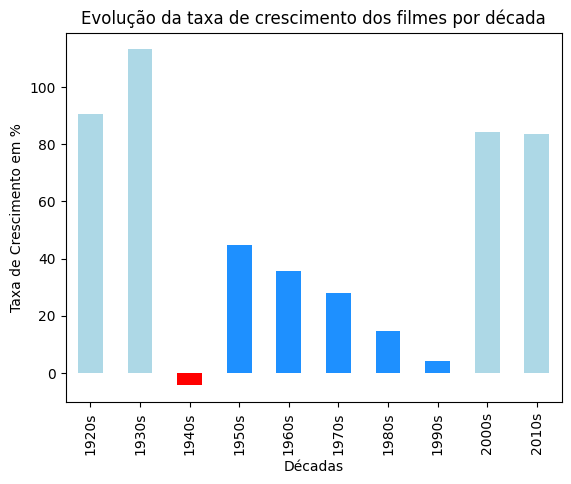

In [8]:
movie_growth = movie_by_dec.loc[movie_by_dec['decades'] != '2020s',['decades','primaryTitle']]


movie_growth['shifted'] = movie_growth['primaryTitle'].shift(periods=1)

movie_growth = movie_growth.dropna()


movie_growth['growth'] = (movie_growth['primaryTitle']/movie_growth['shifted'] - 1)*100

pos_1920 = movie_growth[~movie_growth['decades'].isin(['1900s','1910s'])]

colors_diff = ['red' if val < 0 else 'dodgerblue' if i in [3,4,5,6,7] else 'lightblue' for i,val in enumerate(pos_1920['growth'])]

pos_1920.plot.bar(x='decades',y='growth',xlabel='Décadas',ylabel='Taxa de Crescimento em %',title='Evolução da taxa de crescimento dos filmes por década', color=colors_diff,legend=False)


A taxa de crescimento mostra que no último século tem havido um aumento quase continuo da quantidade de filmes produzido. A partir dos gráficos podemos tirar alguns insights: 
- A grande explosão do cinema ocorreu na década de 1910s. 
- Na década de 40 existiu um leve declino na produção de filmes.
- De 1950 até 1990 houve uma tendência de diminuição da taxa de crescimento na produção de filmes.

runtimeMinutes    Axes(0.125,0.11;0.775x0.77)
dtype: object

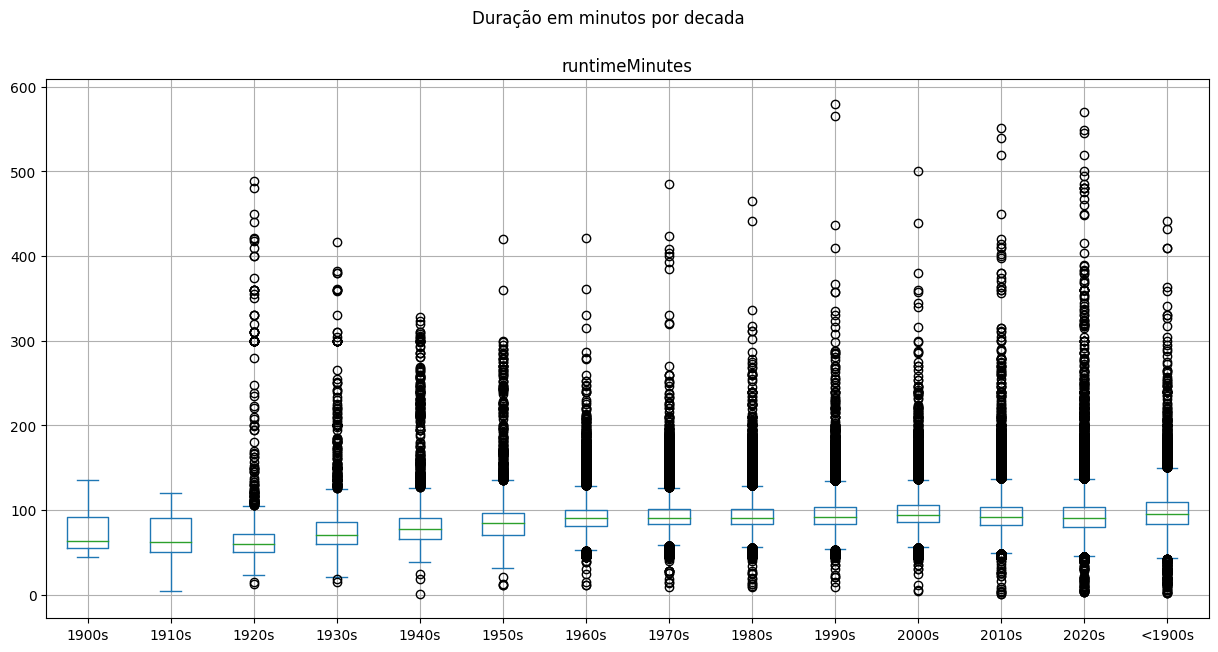

In [9]:
movies.loc[(movies['runtimeMinutes'] < 600) & (movies['runtimeMinutes'] > 0)].plot.box(column='runtimeMinutes',by='decades',figsize=(15,7), grid=True, title='Duração em minutos por decada',ylabel='')

Podemos verificar que a duração média do filmes foi aumentando continuamente até atingir um platô em 1960 e permanecer próximo ao tempo de 1 hora e 40 minutos, entretanto é possivel verificar que existe grande variabilidade na duração do filmes. 

In [10]:


def pivot_table_barh_plot_decade(df,color='blue',topn=5,title='',xlabel='',ylabel='',nrows=7,ncols=2,figsize=(14,28)):
    decades = df.columns

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)  
    axes = axes.flatten() 

    for i, decade in enumerate(decades):
        top_genres = df[decade].sort_values(ascending=False).head(topn)

        axes[i].barh(top_genres.index, top_genres.values, color=color)
        
        axes[i].set_title(f'{title} - {decade}')

        axes[i].invert_yaxis()
            
        axes[i].set_xlabel(xlabel)
        axes[i].set_ylabel(ylabel)

    plt.tight_layout()

    plt.show()

## Análise de filmes por gênero
- Quais são os gêneros mais produzidos em cada década?

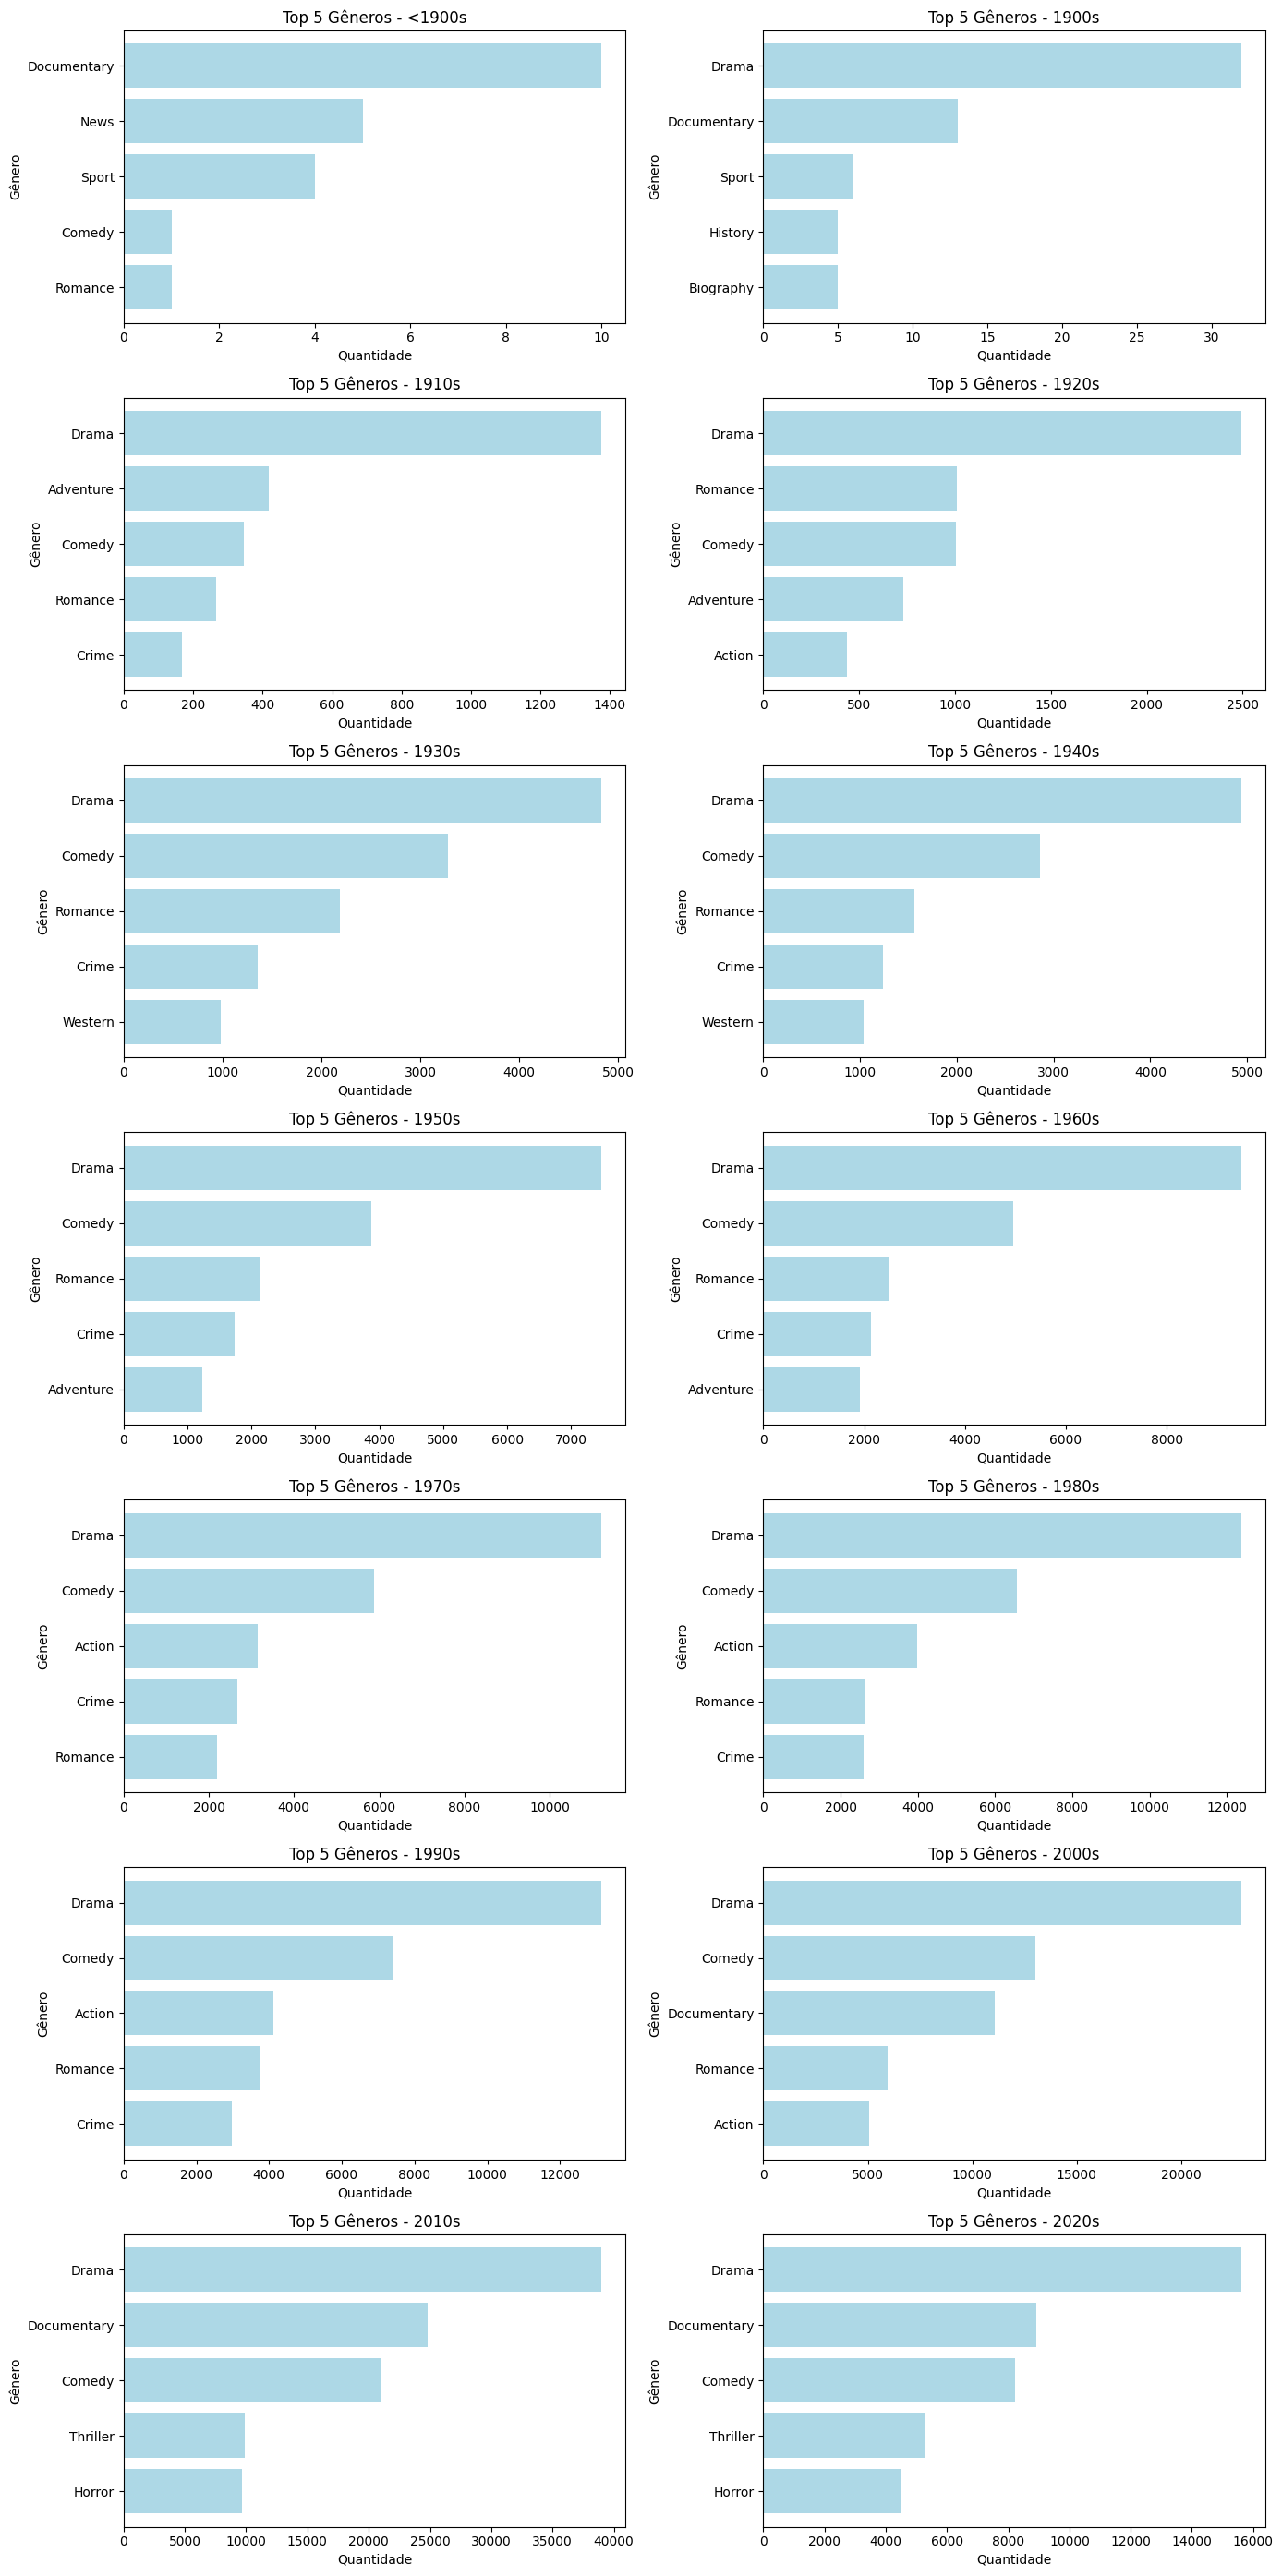

In [11]:
movies_filtered = movies.loc[~pd.isna(movies['genres']),['decades','genres']]

movies_filtered.loc[:,'genres'] = movies_filtered.loc[:,'genres'].str.split(',')

movies_filtered = movies_filtered.explode('genres').reset_index()

movies_pivot = pd.pivot_table(movies_filtered,values='tconst',index=['genres'],columns=['decades'],aggfunc='count')

pivot_table_barh_plot_decade(movies_pivot,'lightblue',5,'Top 5 Gêneros','Quantidade','Gênero')

Podemos concluir que os filmes de drama, desde de o início do cinema, foram os mais produzidos. 

<Axes: title={'center': 'Proporção de gênero de filmes por década'}, xlabel='decades'>

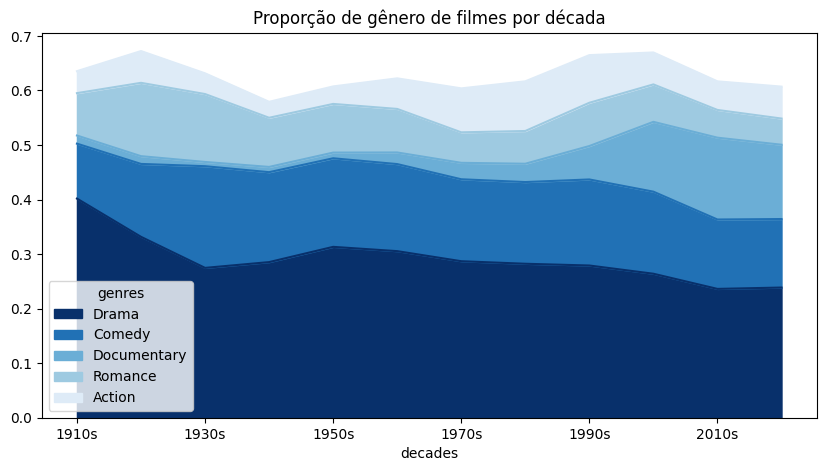

In [12]:
movies_pivot_pos1910 = movies_pivot.drop(['<1900s','1900s'],axis=1)

total_movies = movies_pivot_pos1910.sum()

movies_pivot_pos1910 = movies_pivot_pos1910.transpose()

most_popular_genres = movies_pivot_pos1910.sum().sort_values(ascending=False).head(5).index.to_list()


movies_genre_perc = movies_pivot_pos1910[most_popular_genres].apply(lambda series: series/total_movies)

colors = ['#08306B',  # azul bem escuro
          '#2171B5',  # azul médio
          '#6BAED6',  # azul mais claro
          '#9ECAE1',  # quase um azul pastel
          '#DEEBF7']  # bem clarinho
movies_genre_perc.plot.area(figsize=(10,5),color=colors,title='Proporção de gênero de filmes por década')


A partir do gráfico de área podemos observar o seguinte:
- existe uma leve tendência de declínio nos filmes de drama;
- A porcentagem de documentários aumentou considerávelmente depois de 1990. 

## Análise das notas?
- Como tratar os filmes com baixo número de notas?
- Quais são os melhores filmes?
- Quais genêros tem a maior nota?

In [14]:
min = 1000 # numero minimo aceitável de votos
mean = movies['averageRating'].mean()

movies['weighted_ratings'] = (movies['numVotes']/(movies['numVotes'] + min))*movies['averageRating'] + (min/(movies['numVotes'] + min))*mean

Normalizando a média de rating dos filmes para dar mais valor à filmes com maior numero. Assim podemos encontrar os 10 filmes melhor avaliados. 

In [15]:
movies[['primaryTitle','weighted_ratings']].sort_values(by=['weighted_ratings'],ascending=False).head(10)

,primaryTitle,weighted_ratings
tconst,,
tt0111161,The Shawshank Redemption,9.298953
tt0068646,The Godfather,9.198548
tt0252487,The Chaos Class,9.132463
tt33175825,Attack on Titan the Movie: The Last Attack,9.038862
tt0259534,Ramayana: The Legend of Prince Rama,9.022696
tt0468569,The Dark Knight,8.999046
tt0167260,The Lord of the Rings: The Return of the King,8.998616
tt0108052,Schindler's List,8.998111
tt0071562,The Godfather Part II,8.997988


Existe diferença significativa entre os ratings dos filmes devido ao gênero?

<Axes: ylabel='genres'>

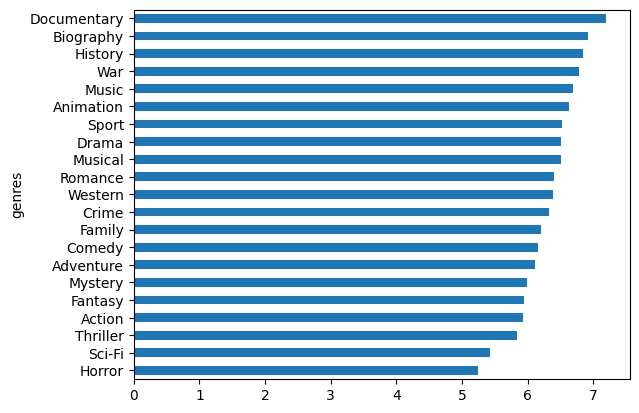

In [51]:
movies_filtered = movies.loc[~pd.isna(movies['genres'])]

movies_filtered.loc[:,'genres'] = movies_filtered.loc[:,'genres'].str.split(',')

movies_filtered = movies_filtered.explode('genres').reset_index()

rating_by_genre = movies_filtered[movies_filtered['numVotes'] > min].groupby('genres')['averageRating'].agg(['mean','count'])

rating_by_genre = rating_by_genre[rating_by_genre['count'] >= 500]

rating_by_genre['mean'].sort_values().plot.barh()